In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
TrainBS4MBS_4__KMAX_16llama7b_AdamW_0.0005_1_test_results.npy

In [ ]:
TrainBS_4__MBS_4__KMAX_16__BiAdam_0.0001_111_test_results.npy

In [3]:
def load_result(base_lr, mbs, bs, seeds=[1], opt='AdamW', kmax=None):
    name_template = f'./results_llm/cqa/' + f'TrainBS{bs}MBS_{mbs}__KMAX_{kmax}llama7b_{opt}_{base_lr}_{{}}_{{}}_results.npy'
    train_logs = []
    test_logs = []
    for seed in seeds:
        train_logs.append(np.load(name_template.format(seed, 'train')))
        test_logs.append(np.load(name_template.format(seed, 'test')))
    return np.stack(train_logs), np.stack(test_logs)

def load_result_bert(base_lr, mbs, bs, seeds=[1, 111, 11111], opt='AdamW', kmax=None):
    base_dir = '/home/xwang3_umass_edu/work/LLM/bert_test/results/'
    name_template = base_dir + f'TrainBS_{bs}__MBS_{mbs}__KMAX_{kmax}__{opt}_{base_lr}_{{}}_{{}}_results.npy'
    train_logs = []
    test_logs = []
    for seed in seeds:
        # train_logs.append(np.load(name_template.format(seed, 'train')))
        test_logs.append(np.load(name_template.format(seed, 'test')))
    return np.stack(test_logs)

In [2]:
bs_list = [4, 8, 16, 32, 64]
# lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
lrs = [1e-3]
colors = plt.get_cmap('Set1')
colors = [colors([i]) for i in range(10)][:5][::-1]
for i, lr in enumerate(lrs):
    for bs in bs_list:
        R = load_result_bert(lr, 4, bs, kmax=16, opt='BiAdam')
        plt.plot(R.mean(0)[..., 0], label=str(bs), alpha=0.8)
    

NameError: name 'load_result_bert' is not defined

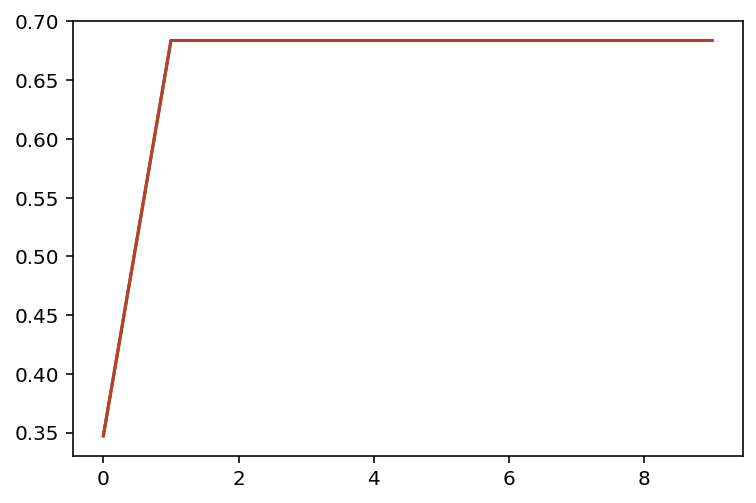

In [9]:
bs_list = [4, 8, 16, 32]
# lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
lrs = [1e-3]
colors = plt.get_cmap('Set1')
colors = [colors([i]) for i in range(10)][:5][::-1]
for i, lr in enumerate(lrs):
    for bs in bs_list:
        R = load_result_bert(lr, 4, bs, kmax=16, opt='AdamW')
        plt.plot(R.mean(0)[..., 0], label=str(bs), alpha=0.8)
    

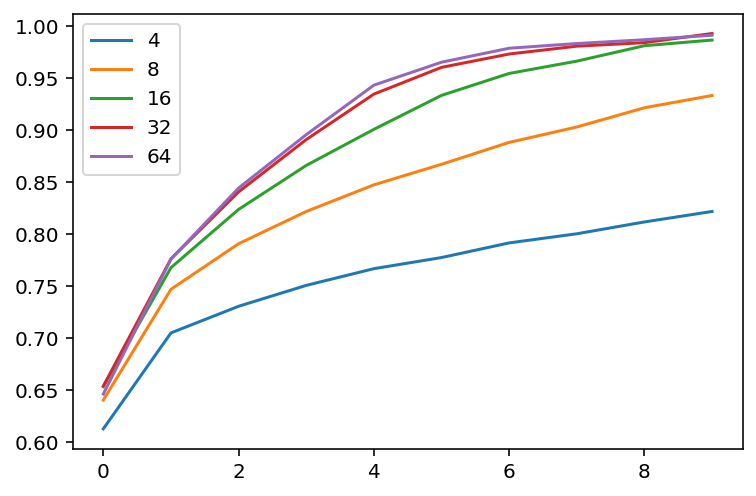

In [107]:
bs_list = [4, 8, 16, 32, 64]
for bs in bs_list:
    R = load_result(1e-4, 4, bs, kmax=16, opt='AdamW')
    plt.plot(R[0].mean(0)[..., 0], label=str(bs))
    
plt.legend()

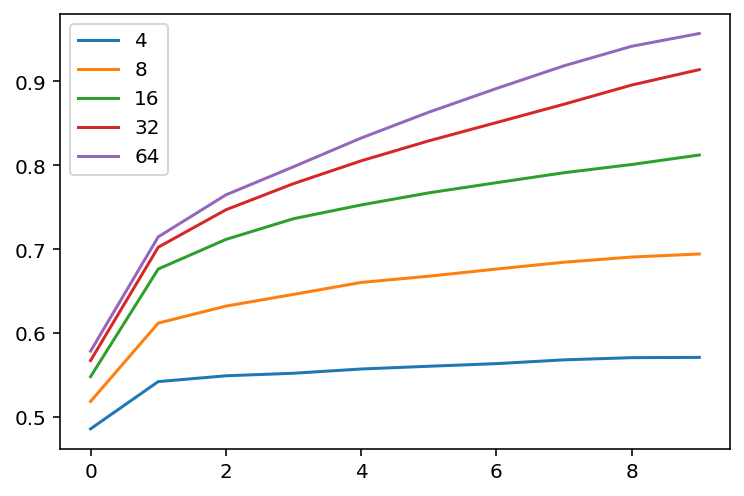

In [108]:
bs_list = [4, 8, 16, 32, 64]
for bs in bs_list:
    R = load_result(1e-4, 4, bs, kmax=16, opt='BiAdam')
    plt.plot(R[0].mean(0)[..., 0], label=str(bs))
    
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: './results_llm/cqa/TrainBS64MBS_4__KMAX_16llama7b_BiAdam_1e-06_1_train_results.npy'

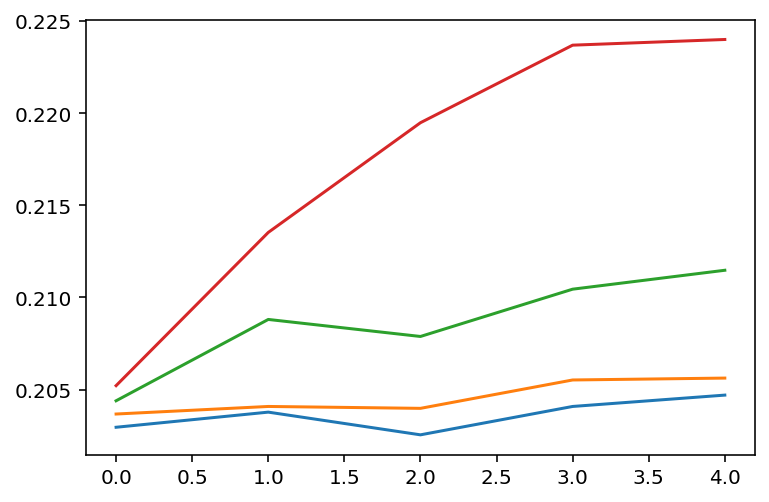

In [86]:
bs_list = [4, 8, 16, 32, 64]
for bs in bs_list:
    R = load_result(1e-6, 4, bs, kmax=16, opt='BiAdam')
    plt.plot(R[0].mean(0)[:5,0], label=str(bs))
    
plt.legend()

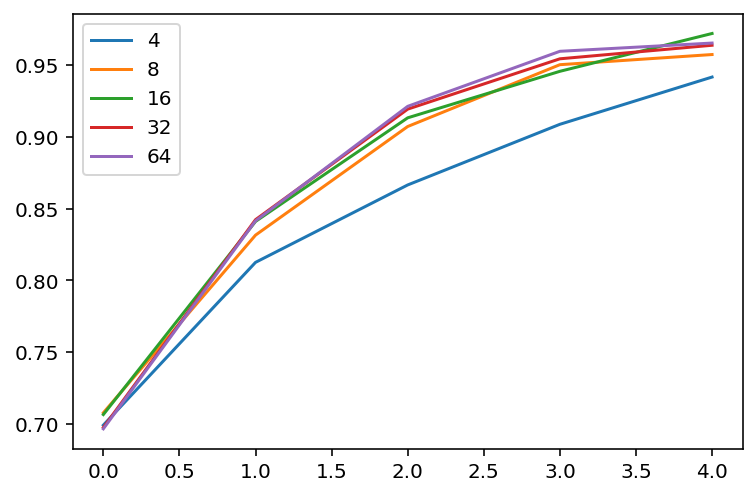

In [80]:
bs_list = [4, 8, 16, 32, 64]
for bs in bs_list:
    R = load_result(5e-4, 4, bs, kmax=16, opt='AdamW')
    plt.plot(R[0].mean(0)[:5,0], label=str(bs))
    
plt.legend()

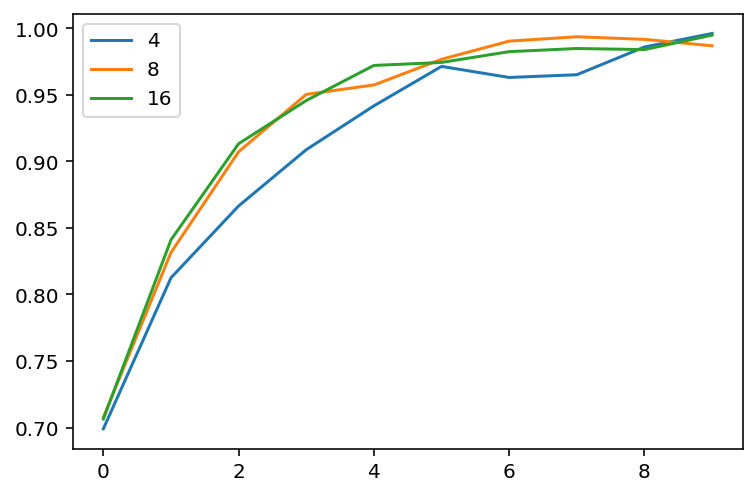

In [70]:
bs_list = [4, 8, 16]
for bs in bs_list:
    R = load_result(5e-4, 4, bs, kmax=16, opt='AdamW')
    plt.plot(R[0].mean(0)[...,0], label=str(bs))
    
plt.legend()

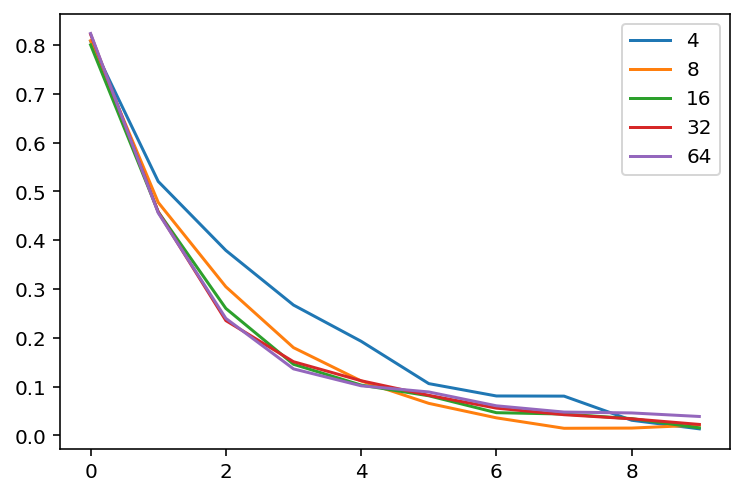

In [32]:
bs_list = [4, 8, 16, 32, 64]
for bs in bs_list:
    R = load_result(5e-4, 4, bs, kmax=16)
    plt.plot(R[0].mean(0)[..., 1], label=str(bs))
plt.legend()